# stars 🌟
classifying stars in Python. 

## Dataset
The dataset used is taken from [here](https://www.kaggle.com/datasets/brsdincer/star-type-classification?resource=download)



### Features
* Temperature (K) 

* Relative Luminosity (L / L☉) (where L☉ denotes the Solar Luminosity (2.82 * 10^26 W))

* Relative Radius (R / R☉) (where R☉ denotes the Solar Radius (7 * 10^10 cm))

* Absolute Magnitude (Mv)

* Color 
    * 'Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'

* Spectral Class 'M', 'B', 'A', 'F', 'O', 'K', 'G'

### Classes

*    Red Dwarf - 0
*    Brown Dwarf - 1
*    White Dwarf - 2
*    Main Sequence - 3
*    Super Giants - 4
*    Hyper Giants - 5


#### imports and constants

In [7]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# 2.82 * 10^26 Watts
SOLAR_LUMINOSITY = 2.82E26

# Map between classes numeric and string representations
CLASSES = {
    0: "Red Dwarf",
    1: "Brown Dwarf",
    2: "White Dwarf",
    3: "Main Sequence",
    4: "Super Giants",
    5: "Hyper Giants",
}

In [8]:
df = pd.read_csv("Stars.csv")
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


lets add a column for the string representation of the type/ class

In [9]:
df["Type_Name"] = [CLASSES[x] for x in df["Type"]]
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Type_Name
0,3068,0.002400,0.1700,16.12,Red,M,0,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,0,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,0,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,0,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,0,Red Dwarf
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5,Hyper Giants
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5,Hyper Giants
237,8829,537493.000000,1423.0000,-10.73,White,A,5,Hyper Giants
238,9235,404940.000000,1112.0000,-11.23,White,A,5,Hyper Giants


In [10]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [11]:
# Check for NaN values
df.isnull().values.any()

False

<AxesSubplot:>

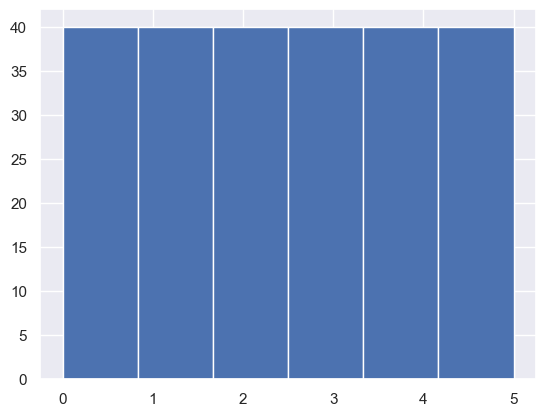

In [12]:
# Lets see how the classes are distributed
classes = df.loc[:,"Type"]
classes.hist(bins = 6)

In [13]:
colors = df.loc[:,"Color"]
colors.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

# Visualizing the data


<AxesSubplot:xlabel='R', ylabel='Temperature'>

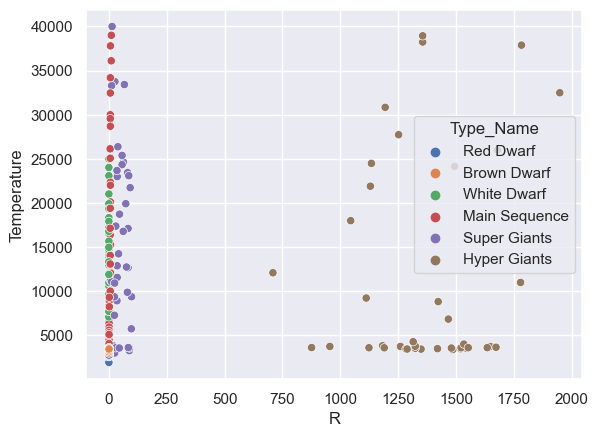

In [14]:
sns.scatterplot(x = df["R"], y = df["Temperature"], hue=df["Type_Name"])

Hyper Giants have the largest Radii of any of the star types, though seem to be generally cooler.

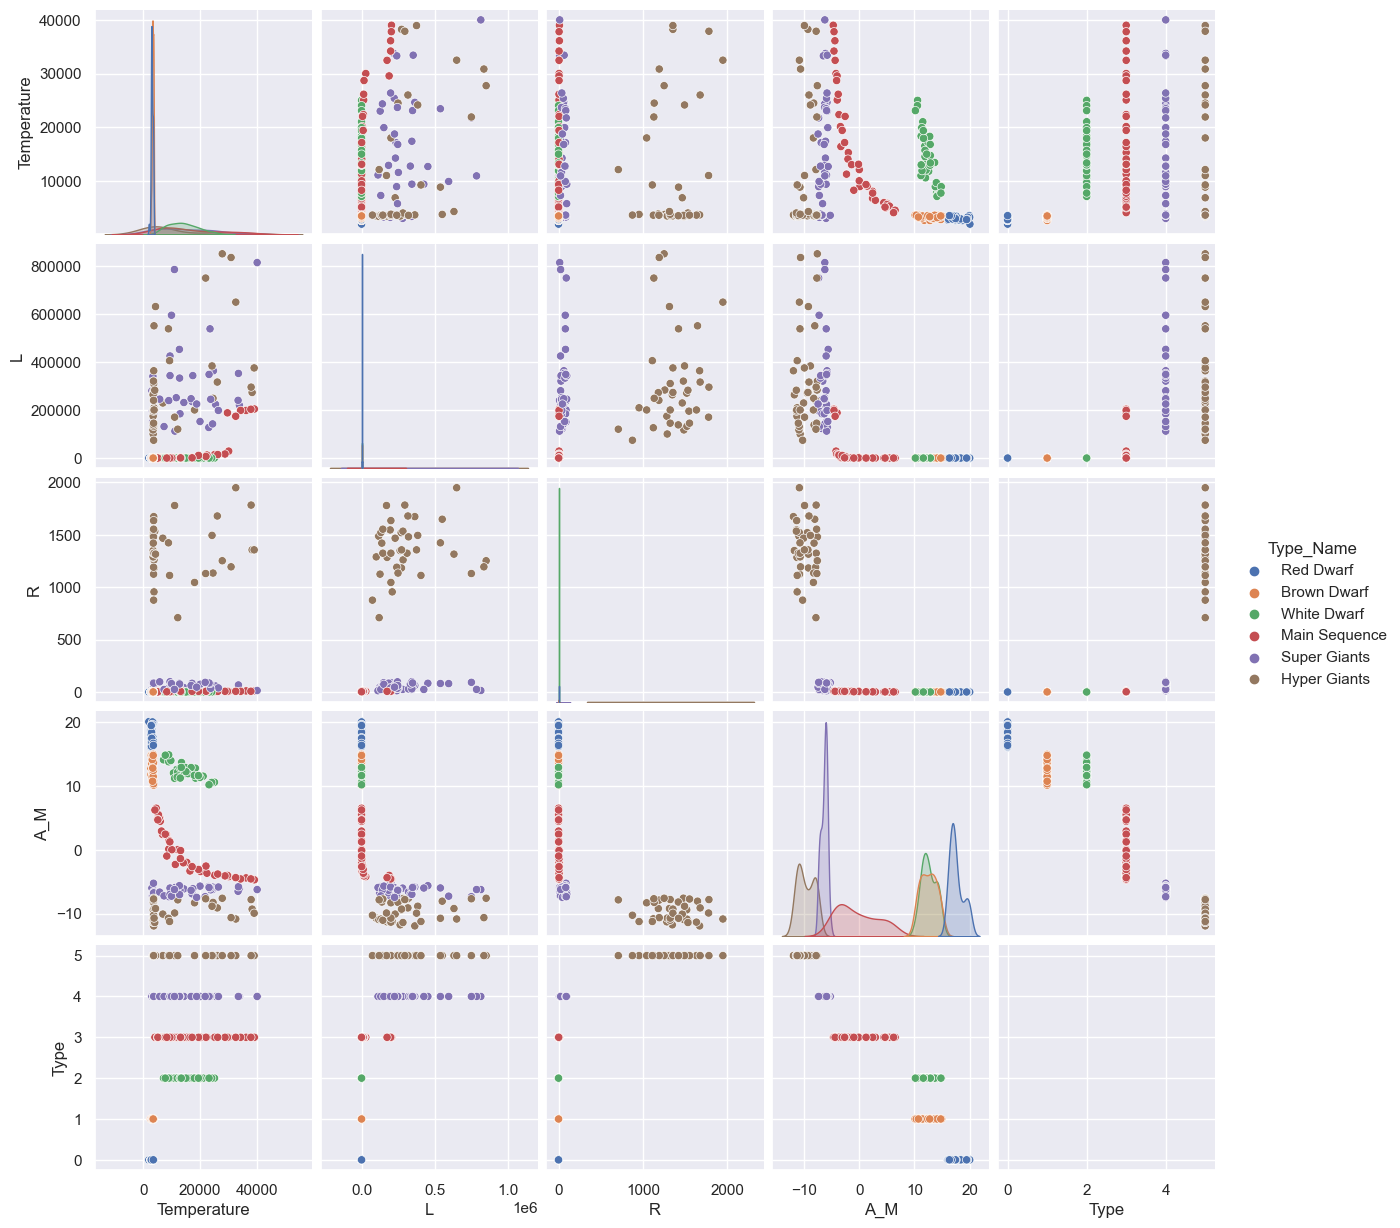

In [15]:
sns.pairplot(df, hue = "Type_Name")

# Hertzsprung-Russel Diagram
The Hertzsprung-Russel Diagram (HR Diagram) is a scatter-plot which displays the relationship between a star's absolute magnitude/ luminosities versus their stellar classifications or temperatures.


Text(0, 0.5, 'Luminosity (Relative to the sun)')

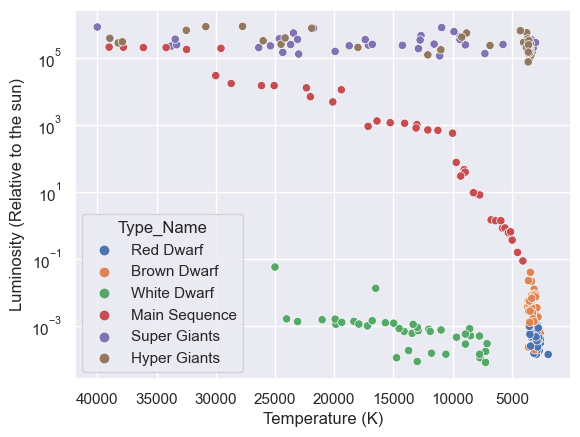

In [16]:
# Lets make an HR diagram
sns.scatterplot(x = df["Temperature"], y = df["L"], hue=df["Type_Name"])
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.yscale('log')
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (Relative to the sun)")